In [8]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set_style('darkgrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

mexico=pd.read_stata('../../ECON628-01-jkemler21/datasets/Mexico_Dataset_Cleaned.dta')


In [9]:
mexico.head(5)

,enc,fecha,nombre,id,banco_comunitario,edad,educacion,religion,estado_civil,hijos,...,real_e,DN,tratamiento,entrevisto_primera_ronda,telefono,dropped,nrb_drf1,ee,status,villageID
0,Russell,d062916,Cresenciana Hernandez de los Angeles,102.0,Mujeres Emprendoras (Valle),34.0,6.0,1.0,1.0,2.0,...,3500.0,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,1.0
1,Larissa,d062916,Inocenia Aracely Arellano Cruz,103.0,Mujeres Emprendoras (Valle),49.0,9.0,2.0,5.0,4.0,...,2000.0,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,1.0
2,Manuel,d062916,Irma Santiago Mateo,104.0,Mujeres Emprendoras (Valle),30.0,6.0,1.0,3.0,3.0,...,20000.0,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,1.0
3,Nelly,d062916,Marilu Gimenez,105.0,Mujeres Emprendoras (Valle),49.0,12.0,1.0,2.0,3.0,...,1600.0,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,1.0
4,Manuel,d070816,Nicolasa Martinez Gutierrez,106.0,Mujeres Emprendoras (Valle),46.0,6.0,1.0,2.0,5.0,...,10000.0,NaN,NaN,NaN,x,NaN,NaN,NaN,NaN,1.0


In [16]:
# dropping unwanted columns, there's alot
mexico.drop(["tratamiento","entrevisto_primera_ronda","ee"],axis=1, inplace=True)

In [17]:
mexico.head()

,enc,fecha,nombre,id,banco_comunitario,edad,educacion,religion,estado_civil,hijos,...,youngasp,aspscore,currentasp,real_d,real_e,telefono,dropped,nrb_drf1,status,villageID
0,Russell,d062916,Cresenciana Hernandez de los Angeles,102.0,Mujeres Emprendoras (Valle),34.0,6.0,1.0,1.0,2.0,...,To have a clothing store,7.0,to have a clothing business,1.0,3500.0,,NaN,NaN,NaN,1.0
1,Larissa,d062916,Inocenia Aracely Arellano Cruz,103.0,Mujeres Emprendoras (Valle),49.0,9.0,2.0,5.0,4.0,...,To be a doctor,8.0,To help be a leader in the community* *=primin...,0.0,2000.0,,NaN,NaN,NaN,1.0
2,Manuel,d062916,Irma Santiago Mateo,104.0,Mujeres Emprendoras (Valle),30.0,6.0,1.0,3.0,3.0,...,To own a bakery and pastry shop,10.0,Grow her business,1.0,20000.0,,NaN,NaN,NaN,1.0
3,Nelly,d062916,Marilu Gimenez,105.0,Mujeres Emprendoras (Valle),49.0,12.0,1.0,2.0,3.0,...,To own a business,7.0,To have other businesses,0.0,1600.0,,NaN,NaN,NaN,1.0
4,Manuel,d070816,Nicolasa Martinez Gutierrez,106.0,Mujeres Emprendoras (Valle),46.0,6.0,1.0,2.0,5.0,...,To own a house,8.0,To own her own business and house,0.0,10000.0,x,NaN,NaN,NaN,1.0


In [62]:
# renaming some columns
mexico.rename(columns={
        'fecha':'date_of_survey',
        'educacion':'education',
        'edad':'age',
        'estado_civil':'marital_status',
        'negocio_c':'savings_per_week',
        'Aspirational Difficulty Score':'Real_or_Unrealized_Aspirational_Score',
    }, inplace=True)

In [63]:
mexico.head()

,enc,date_of_survey,nombre,id,banco_comunitario,age,education,religion,marital_status,hijos,...,satisfacción_l9,satisfacción_l10,aspdiff,youngasp,Real_or_Unrealized_Aspirational_Score,currentasp,real_d,real_e,telefono,villageID
0,Russell,d062916,Cresenciana Hernandez de los Angeles,102.0,Mujeres Emprendoras (Valle),34.0,6.0,1.0,1.0,2.0,...,10.0,10.0,6.0,To have a clothing store,7.0,to have a clothing business,1.0,3500.0,,1.0
1,Larissa,d062916,Inocenia Aracely Arellano Cruz,103.0,Mujeres Emprendoras (Valle),49.0,9.0,2.0,5.0,4.0,...,10.0,10.0,10.0,To be a doctor,8.0,To help be a leader in the community* *=primin...,0.0,2000.0,,1.0
2,Manuel,d062916,Irma Santiago Mateo,104.0,Mujeres Emprendoras (Valle),30.0,6.0,1.0,3.0,3.0,...,10.0,10.0,6.0,To own a bakery and pastry shop,10.0,Grow her business,1.0,20000.0,,1.0
3,Nelly,d062916,Marilu Gimenez,105.0,Mujeres Emprendoras (Valle),49.0,12.0,1.0,2.0,3.0,...,10.0,10.0,5.0,To own a business,7.0,To have other businesses,0.0,1600.0,,1.0
4,Manuel,d070816,Nicolasa Martinez Gutierrez,106.0,Mujeres Emprendoras (Valle),46.0,6.0,1.0,2.0,5.0,...,10.0,10.0,4.0,To own a house,8.0,To own her own business and house,0.0,10000.0,x,1.0


In [46]:
#dropping columns if they only contain "NA", drops 11 more columns
mexico.dropna(axis=1, how='all', inplace=True)
mexico.head()

,enc,date_of_survey,nombre,id,banco_comunitario,age,education,religion,marital_status,hijos,...,satisfacción_l9,satisfacción_l10,aspdiff,youngasp,Aspirational Difficulty Score,currentasp,real_d,real_e,telefono,villageID
0,Russell,d062916,Cresenciana Hernandez de los Angeles,102.0,Mujeres Emprendoras (Valle),34.0,6.0,1.0,1.0,2.0,...,10.0,10.0,6.0,To have a clothing store,7.0,to have a clothing business,1.0,3500.0,,1.0
1,Larissa,d062916,Inocenia Aracely Arellano Cruz,103.0,Mujeres Emprendoras (Valle),49.0,9.0,2.0,5.0,4.0,...,10.0,10.0,10.0,To be a doctor,8.0,To help be a leader in the community* *=primin...,0.0,2000.0,,1.0
2,Manuel,d062916,Irma Santiago Mateo,104.0,Mujeres Emprendoras (Valle),30.0,6.0,1.0,3.0,3.0,...,10.0,10.0,6.0,To own a bakery and pastry shop,10.0,Grow her business,1.0,20000.0,,1.0
3,Nelly,d062916,Marilu Gimenez,105.0,Mujeres Emprendoras (Valle),49.0,12.0,1.0,2.0,3.0,...,10.0,10.0,5.0,To own a business,7.0,To have other businesses,0.0,1600.0,,1.0
4,Manuel,d070816,Nicolasa Martinez Gutierrez,106.0,Mujeres Emprendoras (Valle),46.0,6.0,1.0,2.0,5.0,...,10.0,10.0,4.0,To own a house,8.0,To own her own business and house,0.0,10000.0,x,1.0


In [45]:
# describing the dataset, good way to look at the mean for education, children, age, etc.
mexico.describe()

,id,age,education,religion,marital_status,hijos,hijos_menores,dormitorios,materiales_paredes,material_piso,...,satisfacción_l6,satisfacción_l7,satisfacción_l8,satisfacción_l9,satisfacción_l10,aspdiff,Aspirational Difficulty Score,real_d,real_e,villageID
count,375.000000,374.000000,374.000000,373.000000,375.000000,375.000000,375.000000,375.000000,374.000000,375.000000,...,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,377.000000
mean,1669.173333,43.237968,7.748663,1.463807,2.330667,3.029333,1.242667,2.309333,1.818182,1.216000,...,9.160428,9.425134,9.601604,9.745989,9.890374,4.927807,5.882353,0.398396,3820.454545,15.888595
std,911.066663,13.895225,3.913397,0.874921,0.995978,1.818412,1.275979,1.064896,1.758653,0.619436,...,1.330579,1.039957,0.821362,0.635983,0.434767,1.961459,3.583109,0.490224,3943.371274,9.112964
min,102.000000,17.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,4.000000,5.000000,5.000000,6.000000,6.000000,1.000000,0.000000,0.000000,150.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.000000
max,3407.000000,85.000000,21.000000,5.000000,5.000000,10.000000,6.000000,6.000000,9.000000,6.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,30000.000000,33.000000


In [26]:
#looking at a variable of interest here "Savings per Week". Can see the high variability.
mexico["savings_per_week"]

0       250.0
1       500.0
2      7000.0
3       200.0
4      2000.0
5      2800.0
6       300.0
7       600.0
8       100.0
9       600.0
10      400.0
11     2100.0
12     1400.0
13      150.0
14      750.0
15     4000.0
16     2000.0
17      400.0
18      400.0
19       75.0
20      500.0
21      150.0
22      300.0
23     1500.0
24      100.0
25      300.0
26       60.0
27      400.0
28      400.0
29      100.0
        ...  
347     400.0
348     700.0
349     100.0
350    1400.0
351    1500.0
352    5760.0
353     600.0
354    1000.0
355     100.0
356     200.0
357     500.0
358     500.0
359     720.0
360     600.0
361     700.0
362     200.0
363     200.0
364     700.0
365     500.0
366     150.0
367    1200.0
368    2000.0
369    1800.0
370     400.0
371    7000.0
372    2000.0
373    1500.0
374    1200.0
375       NaN
376       NaN
Name: savings_per_week, dtype: float64

In [86]:
mexico["savings_per_week"].fillna((0),inplace=True)

In [87]:
mexico['savings_per_week']

0       250.0
1       500.0
2      7000.0
3       200.0
4      2000.0
5      2800.0
6       300.0
7       600.0
8       100.0
9       600.0
10      400.0
11     2100.0
12     1400.0
13      150.0
14      750.0
15     4000.0
16     2000.0
17      400.0
18      400.0
19       75.0
20      500.0
21      150.0
22      300.0
23     1500.0
24      100.0
25      300.0
26       60.0
27      400.0
28      400.0
29      100.0
        ...  
347     400.0
348     700.0
349     100.0
350    1400.0
351    1500.0
352    5760.0
353     600.0
354    1000.0
355     100.0
356     200.0
357     500.0
358     500.0
359     720.0
360     600.0
361     700.0
362     200.0
363     200.0
364     700.0
365     500.0
366     150.0
367    1200.0
368    2000.0
369    1800.0
370     400.0
371    7000.0
372    2000.0
373    1500.0
374    1200.0
375       0.0
376       0.0
Name: savings_per_week, dtype: float64

In [35]:
mexico["education"]

0       6.0
1       9.0
2       6.0
3      12.0
4       6.0
5       6.0
6       8.0
7       6.0
8       9.0
9      12.0
10     12.0
11      4.0
12      6.0
13     12.0
14      2.0
15      9.0
16      9.0
17      0.0
18      0.0
19      0.0
20      6.0
21      2.0
22      6.0
23      0.0
24      3.0
25      9.0
26      6.0
27      6.0
28      3.0
29      0.0
       ... 
347     9.0
348     9.0
349    16.0
350     0.0
351    12.0
352     9.0
353     4.0
354     9.0
355     0.0
356     9.0
357     0.0
358     6.0
359     2.0
360     1.0
361     4.0
362     9.0
363     1.0
364     3.0
365    12.0
366     0.0
367     5.0
368     6.0
369     0.0
370     6.0
371     9.0
372     5.0
373     6.0
374    12.0
375     NaN
376     NaN
Name: education, dtype: float64

In [50]:
# replacing NA values with the mean for education
mexico["education"].fillna(mexico["education"].mean(), inplace=True)

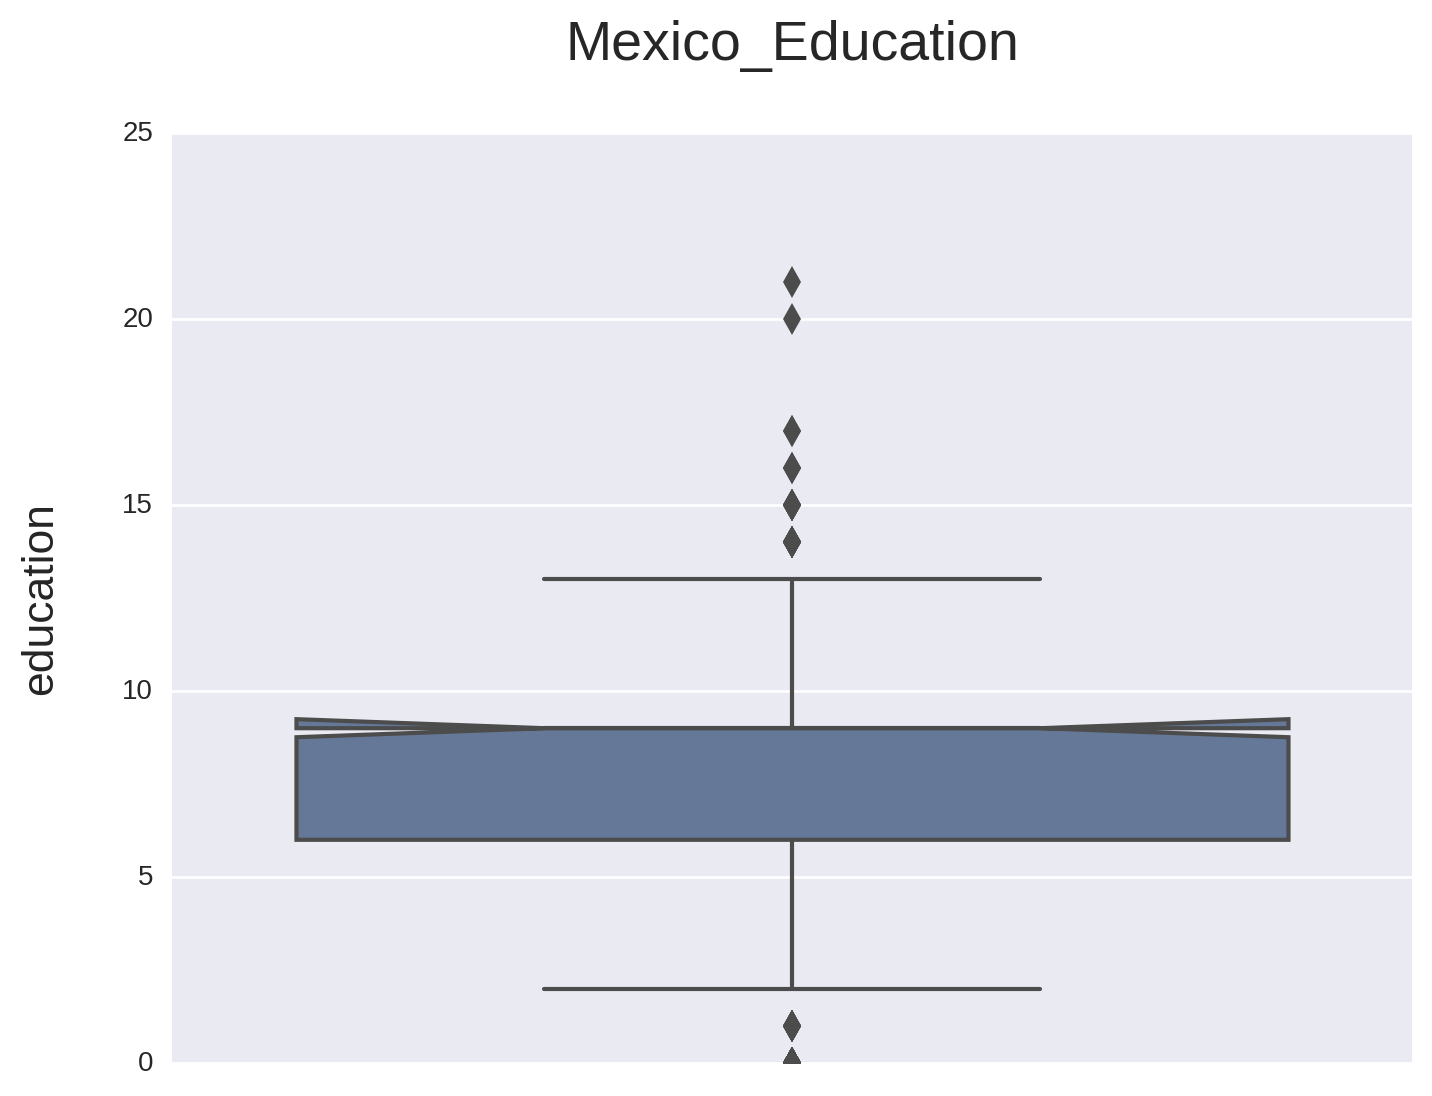

In [52]:
fig = plt.figure(figsize=(8,6))
ax = fig.gca()

sns.boxplot(mexico.education, orient='v',
            fliersize=8, linewidth=1.5, notch=True, 
            saturation=0.5, ax=ax)

ax.set_ylabel('education\n', fontsize=16)
ax.set_title('Mexico_Education\n', fontsize=20)

plt.show()

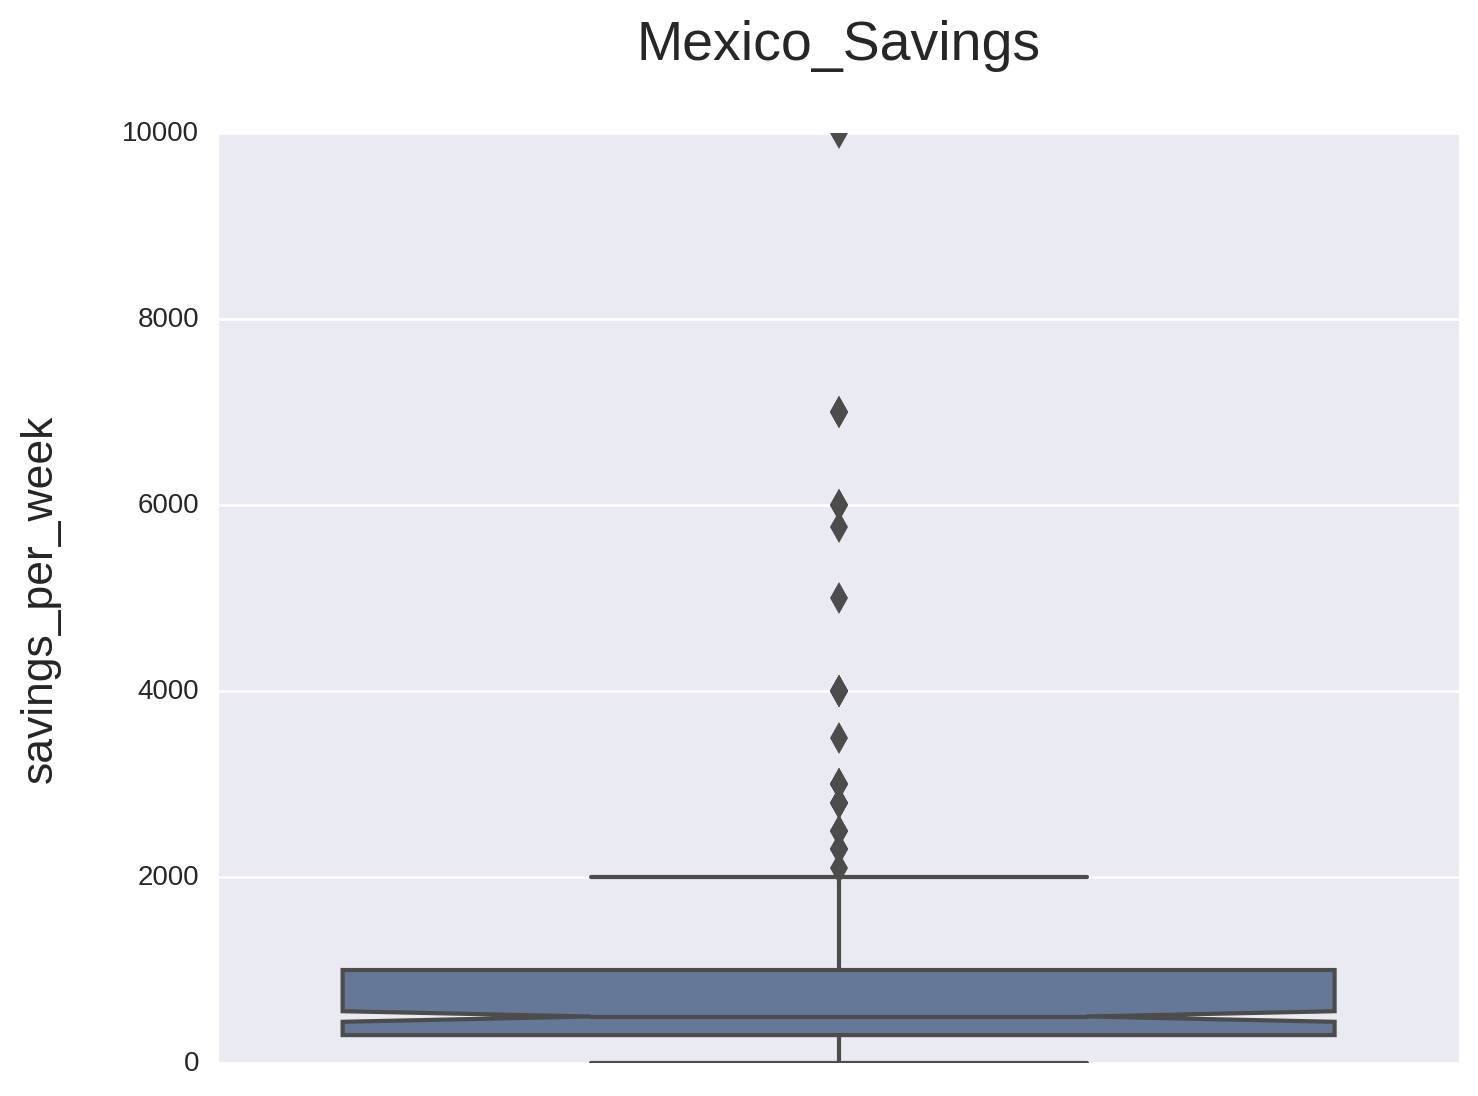

In [38]:
fig = plt.figure(figsize=(8,6))
ax = fig.gca()

sns.boxplot(mexico.savings_per_week, orient='v',
            fliersize=8, linewidth=1.5, notch=True, 
            saturation=0.5, ax=ax)

ax.set_ylabel('savings_per_week\n', fontsize=16)
ax.set_title('Mexico_Savings\n', fontsize=20)

plt.show()

In [ ]:
#it looks as if the savings data has more outliers than the education

In [64]:
mexico[["age","education","hijos","happy","LS","savings_per_week","Real_or_Unrealized_Aspirational_Score"]].corr()

,age,education,hijos,happy,LS,savings_per_week,Real_or_Unrealized_Aspirational_Score
age,1.000000,-0.430236,0.463520,-0.011719,0.021137,-0.041805,0.091010
education,-0.430236,1.000000,-0.462110,0.013473,0.009170,0.151239,-0.021167
hijos,0.463520,-0.462110,1.000000,0.031199,-0.020127,-0.053700,0.086579
happy,-0.011719,0.013473,0.031199,1.000000,0.481772,0.137169,-0.010573
LS,0.021137,0.009170,-0.020127,0.481772,1.000000,0.131204,0.020457
savings_per_week,-0.041805,0.151239,-0.053700,0.137169,0.131204,1.000000,0.118429
Real_or_Unrealized_Aspirational_Score,0.091010,-0.021167,0.086579,-0.010573,0.020457,0.118429,1.000000


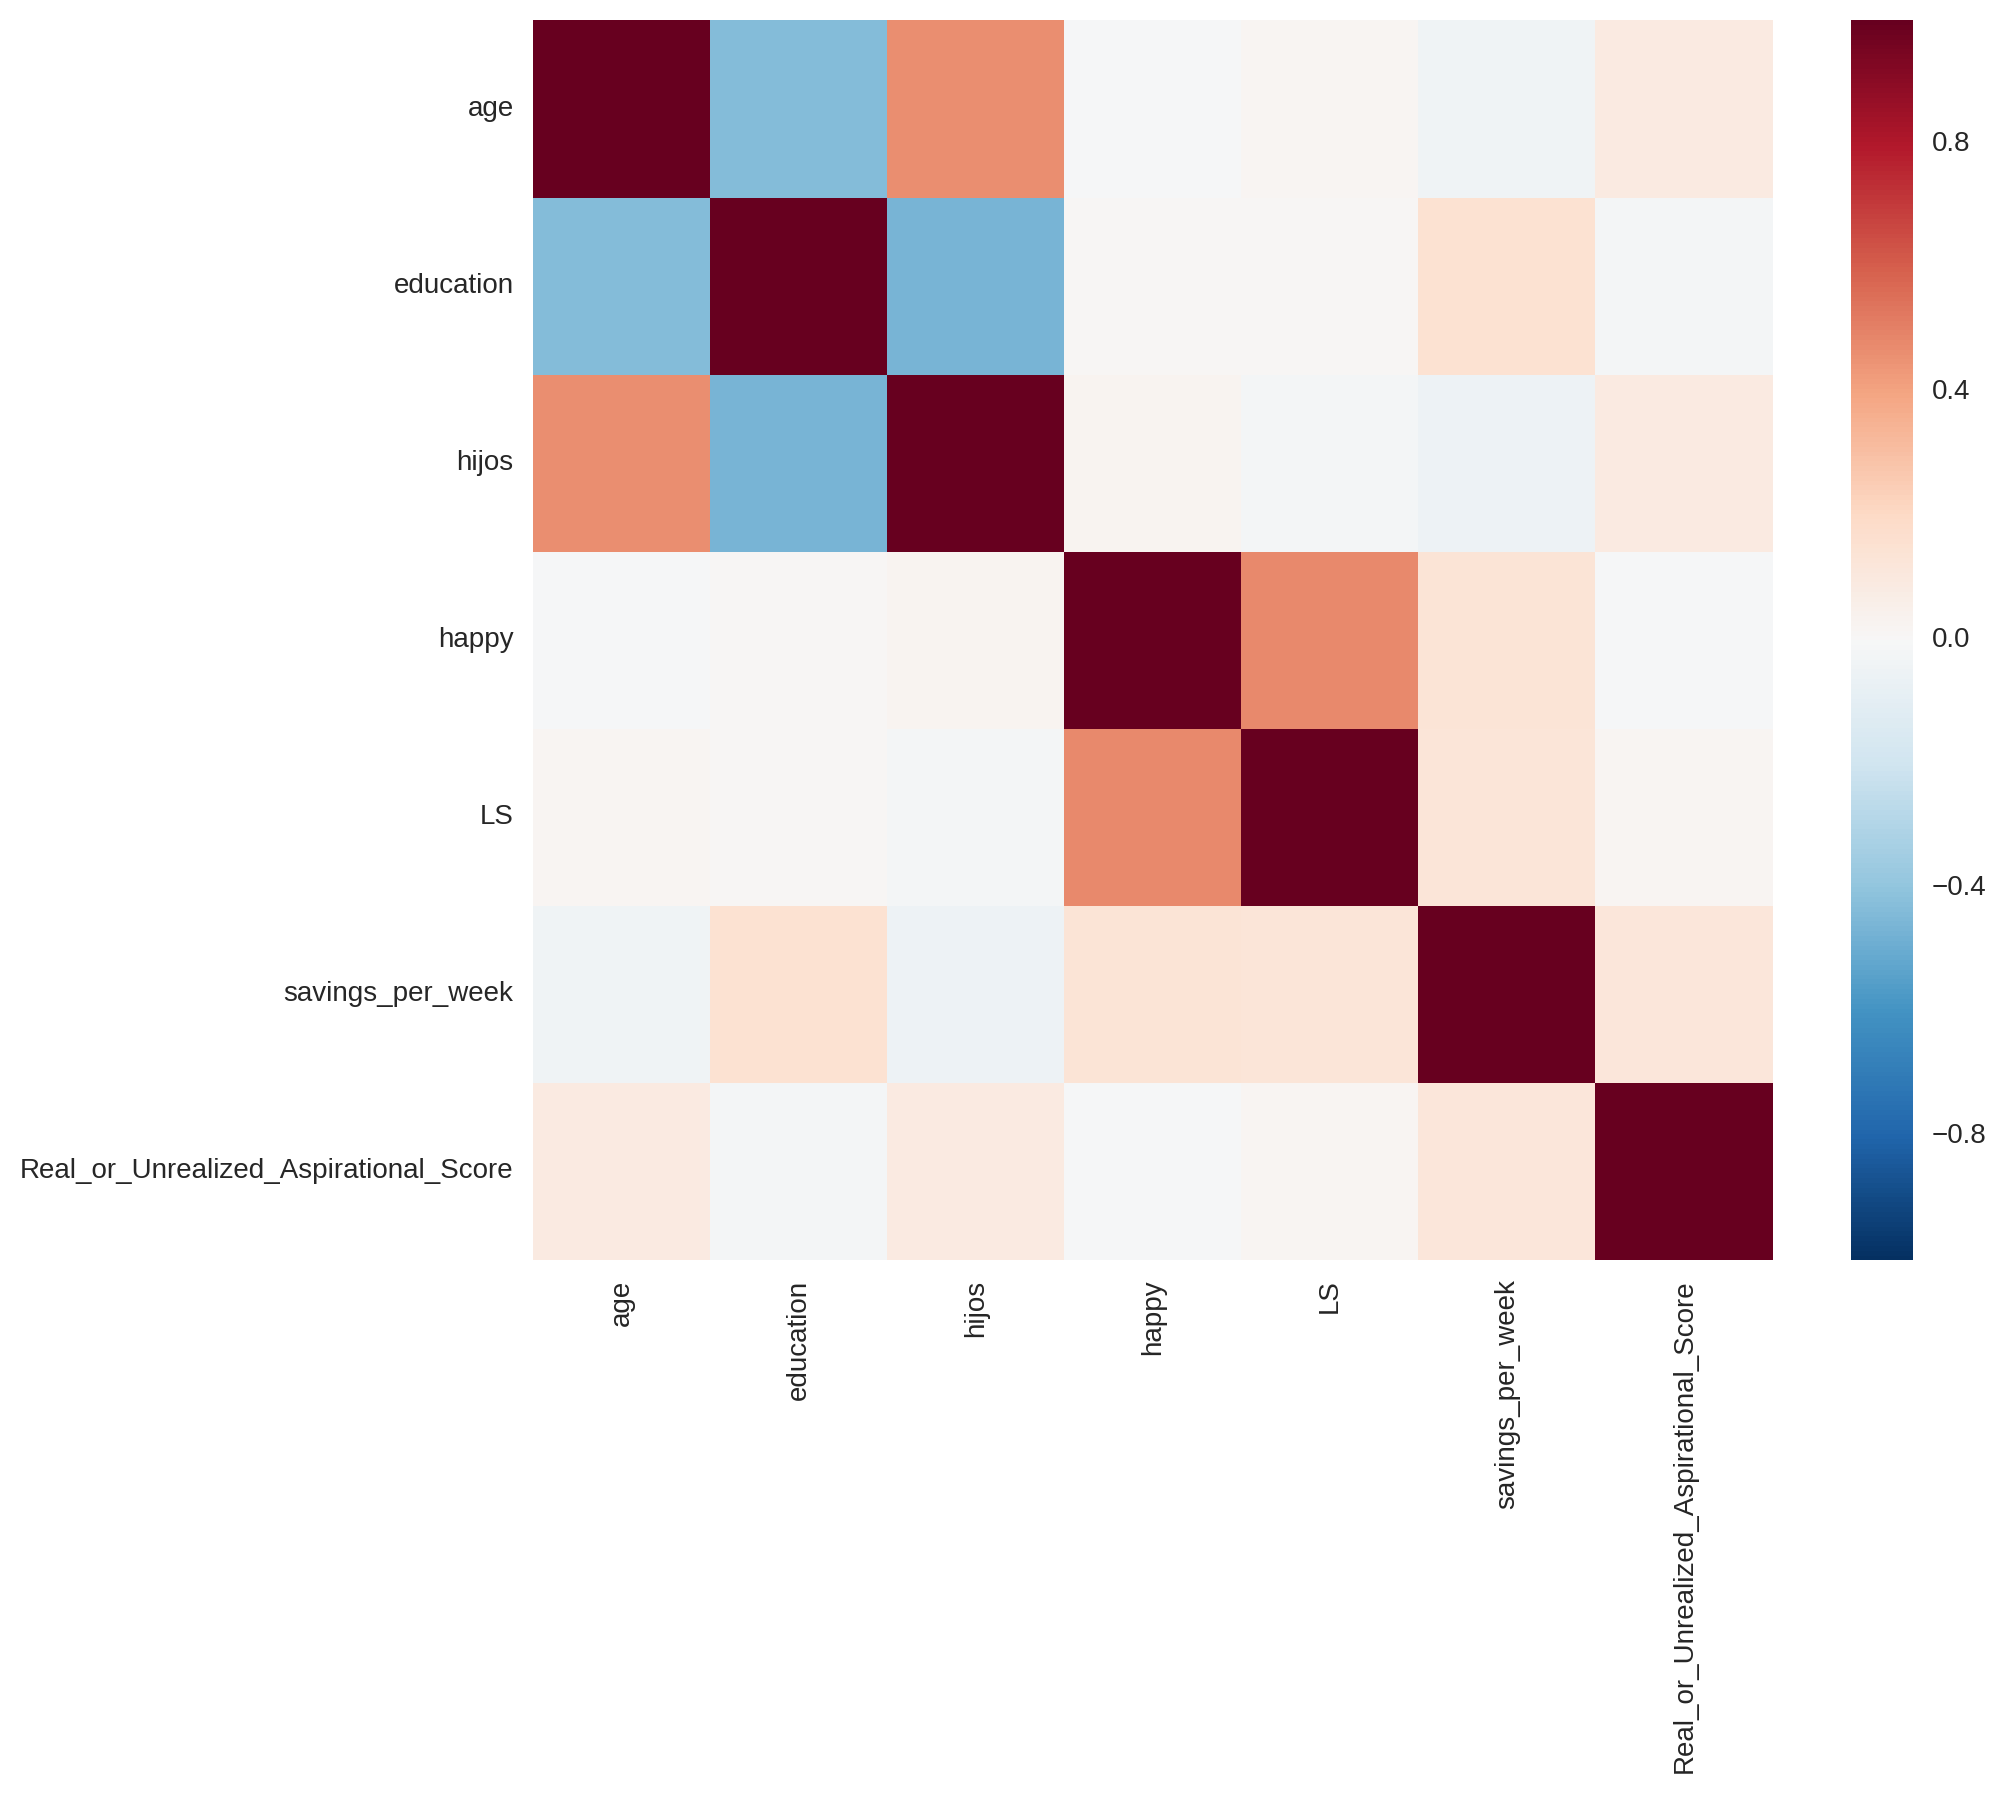

In [65]:
fig = plt.figure(figsize=(10,8))
ax = fig.gca()

sns.heatmap(mexico[["age","education","hijos","happy","LS","savings_per_week","Real_or_Unrealized_Aspirational_Score"]].corr(), ax=ax)
plt.show()

In [ ]:
#We can see from the above heatmap that typical indicators such as children and eduaction are inversely related.
#This can be explained by the fact that many women have their first child, very young. Thus taking many of them out of school rather early.

In [72]:
mexico.groupby(["Real_or_Unrealized_Aspirational_Score"]).size()

Real_or_Unrealized_Aspirational_Score
0.0     74
1.0      6
2.0      9
3.0      7
4.0      8
5.0     44
6.0     16
7.0     42
8.0     68
9.0     31
10.0    69
dtype: int64

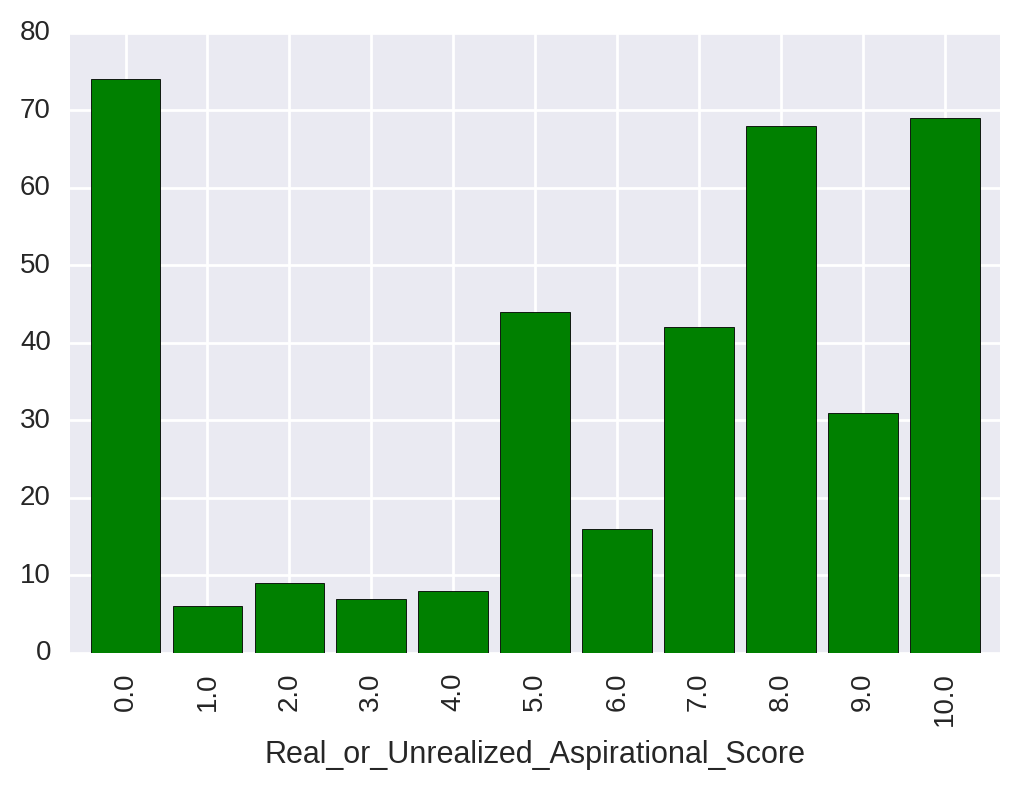

In [73]:
#Looking at the distribution of subjective aspirational scores. We can see that the data is censored from below at zero, and from above at 10
#The data is highly clustered around zero and 10, I think later on I will look to find a way to transform this variable.
mexico.groupby("Real_or_Unrealized_Aspirational_Score").size().plot(kind="bar", color="g", width=0.85)
plt.show()

In [74]:
def histogram_plotter(title, data):
    sns.set(rc={"figure.figsize": (10, 7)})
    sns.set_style('white')
#     dist = sns.distplot(data, kde=False, bins=30)
    dist = sns.distplot(data, hist_kws={'alpha':0.2}, kde_kws={'linewidth':5})
    
    dist.axvline(np.mean(data), lw=5, c='darkred', ls='dashed')
    average_roll = '{0:.2f}'.format(np.mean(data))
    title = 'Distribution of ' + title + '; average = '  + average_roll + '\n'
    dist.set_title(title, fontsize=16)
    dist = sns.distplot(data, hist_kws={'alpha':0.2}, kde_kws={'linewidth':5})

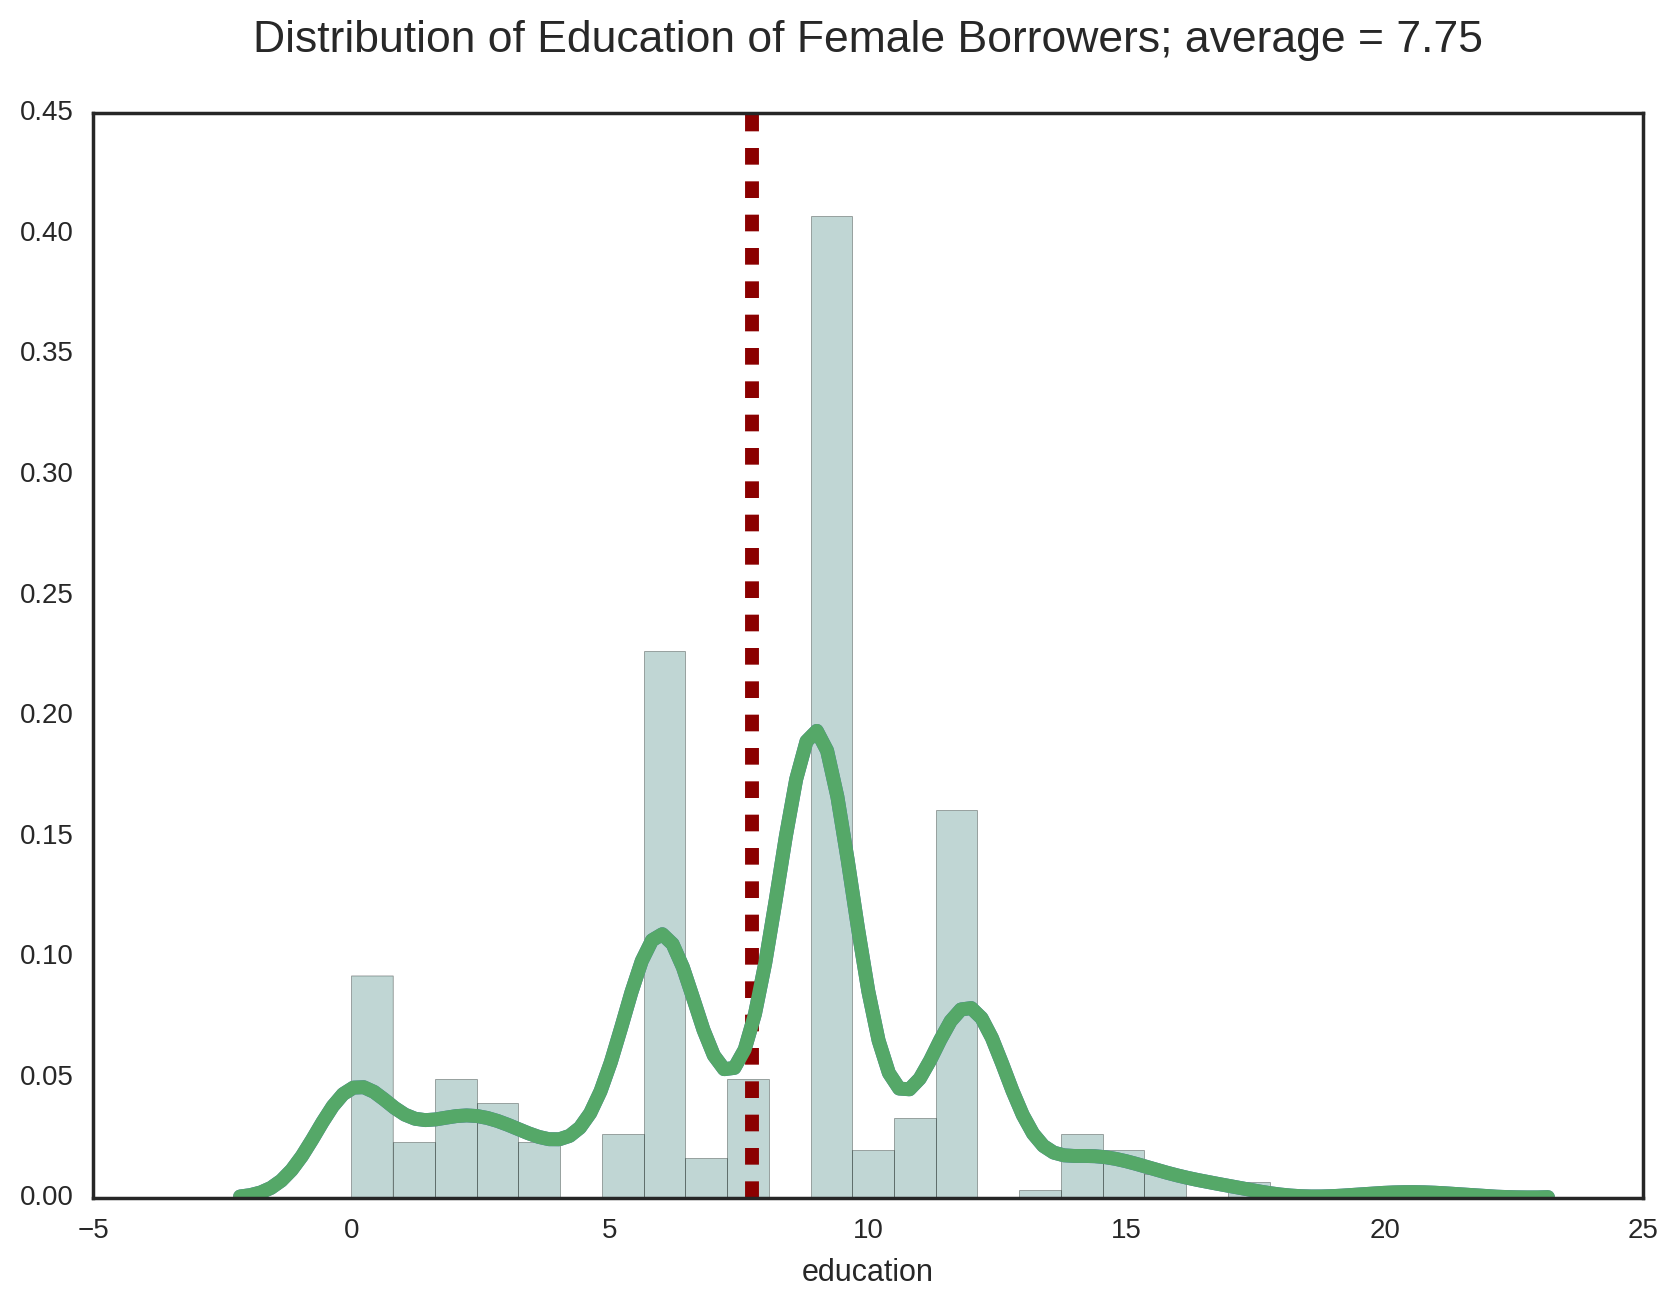

In [89]:
histogram_plotter("Education of Female Borrowers", mexico.education)

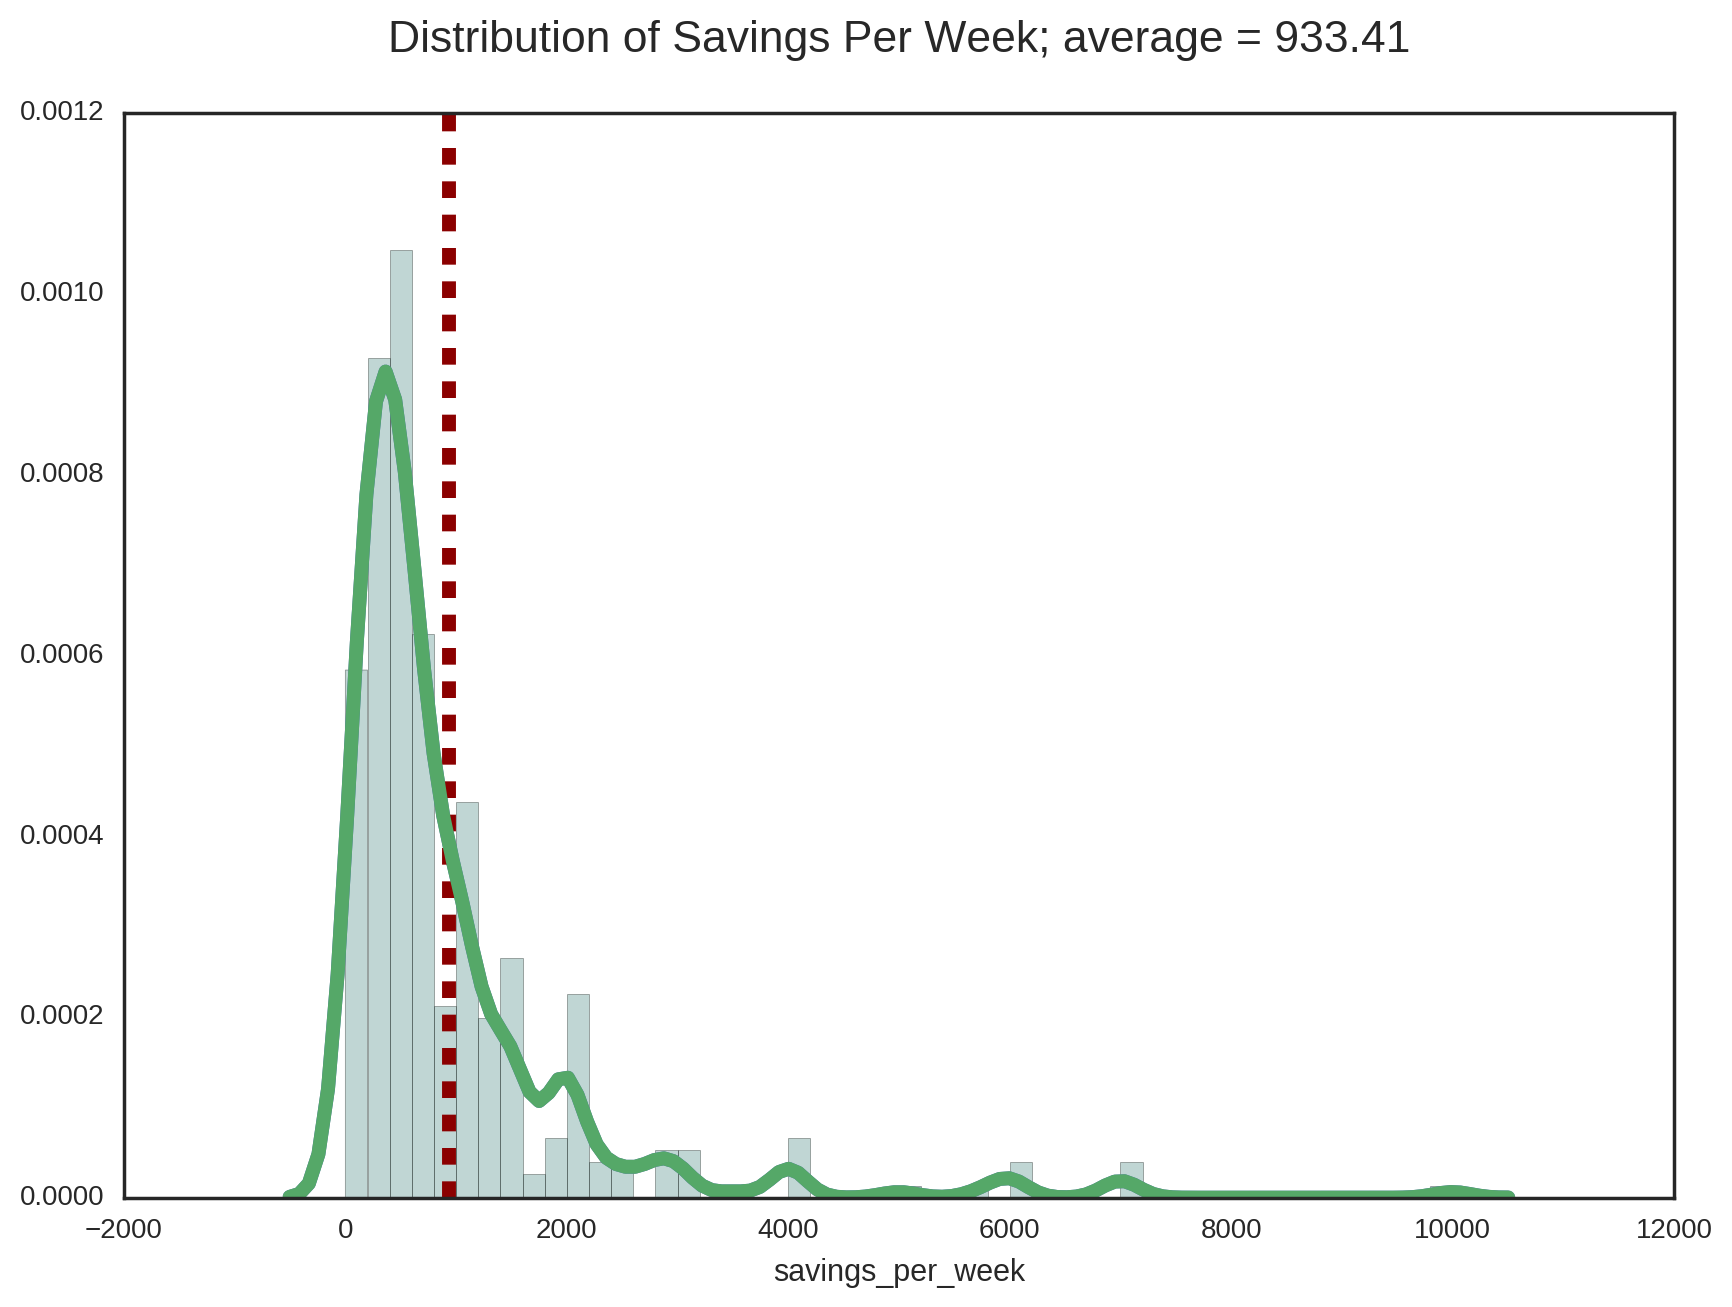

In [88]:
histogram_plotter("Savings Per Week", mexico.savings_per_week)

# Project 1 Write-Up

For project one I attempted to do an extensive cleaning of my data using pandas and the jupyter notebook. I hit quite a few snags, mainly dealing with variable types (string, float or integer problems). After investigating some of my variables, mainly education and savings_per_week, It seems that savings per week provides quite a few outliers to it's distribution. The boxplot & histogram grapchic of savings per week, along with the graphic that showed my variable "Real or Unrealized Aspirations" is highly skewed at the lower and upper bounds, proved very useful.

I will be honest, I did not find anything to interesting about my dataset in this project. I mainly was doing repetition work trying to become more efficient using pandas and seaborn. Learning how to replace missing data points with 0's and the average of that variable may have been the most useful technique I learned. The colored correlation heatmap was also useful. It gave a good graphical representation of how some of my control variables are negatively correlated, such as children and education.

I still need to peruse and clean up my dataset even more. I want it to be at the point where it is with my cleaning do.file in stata. Then I will look into different ways I can explore the relationship between my dependent variable  (LS = Life Satisfaction) and my main explanatory variables (Aspirations, achievement and aspirational difficulty).
